In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:

df = pd.read_excel(r"C:\Users\marco\Desktop\GitProjects\app_plagio\Excels\logs-exam.xlsx")

eventos_permitidos = ['Intento de examen iniciado', 'Intento de examen enviado', 'Intento de examen actualizado']
df = df[df['Nombre del evento'].isin(eventos_permitidos)]

df['Hora'] = df['Hora'].apply(lambda texto: int(texto.split()[1][3:5]) * 60 + int(texto.split()[1][6:8]))

# Editar la descripción para preguntas específicas
def editar_descripcion(texto):
    index_start = 52 if "'" in texto[18:20] else 53
    return texto[index_start:index_start + 2].strip("'") if texto[index_start:index_start + 2] == '10' else texto[index_start:index_start + 1]

df['Descripción'] = df.apply(
    lambda x: editar_descripcion(x['Descripción']) if x['Nombre del evento'] == 'Intento de examen actualizado' else x['Descripción'], 
    axis=1
)

# Cambiar descripciones según evento
df.loc[df['Nombre del evento'] == 'Intento de examen enviado', 'Descripción'] = 'Final'
df.loc[df['Nombre del evento'] == 'Intento de examen iniciado', 'Descripción'] = 'Inicio'

# Calcular tiempos y ajustar valores
df['Tiempo'] = df['Hora'].shift(1) - df['Hora']
df.loc[df['Descripción'] == '1', 'Tiempo'] = df['Hora'].shift(1) - df['Hora'].shift(-1)
df.loc[df['Descripción'].isin(['Final', 'Inicio']), 'Tiempo'] = 0
df['Tiempo'] = df['Tiempo'].apply(lambda x: random.randint(16, 19) if x < 0 else int(x))

# Eliminar filas no deseadas
df = df[~df['Descripción'].isin(['Final', 'Inicio'])]

# Renombrar columna
df = df.rename(columns={'Nombre completo del usuario': 'Usuario', 'Descripción': 'Pregunta'})

# Asignar IDs únicos a cada usuario
df['Id'] = df['Usuario'].map({usuario: idx for idx, usuario in enumerate(df['Usuario'].unique(), start=1)})

# Reorganizar columnas
df = df.drop([1615, 1613, 1617, 1600, 1598, 1596]) 
df = df[['Id', 'Usuario', 'Pregunta', 'Tiempo']]  

df


,Id,Usuario,Pregunta,Tiempo
36,1,Josue Lopez,10,4
38,1,Josue Lopez,9,1
40,1,Josue Lopez,8,3
42,1,Josue Lopez,9,8
44,1,Josue Lopez,10,3
...,...,...,...,...
1477,44,Anderson Molina,3,38
1479,44,Anderson Molina,2,17
1481,44,Anderson Molina,1,35
1483,44,Anderson Molina,2,3


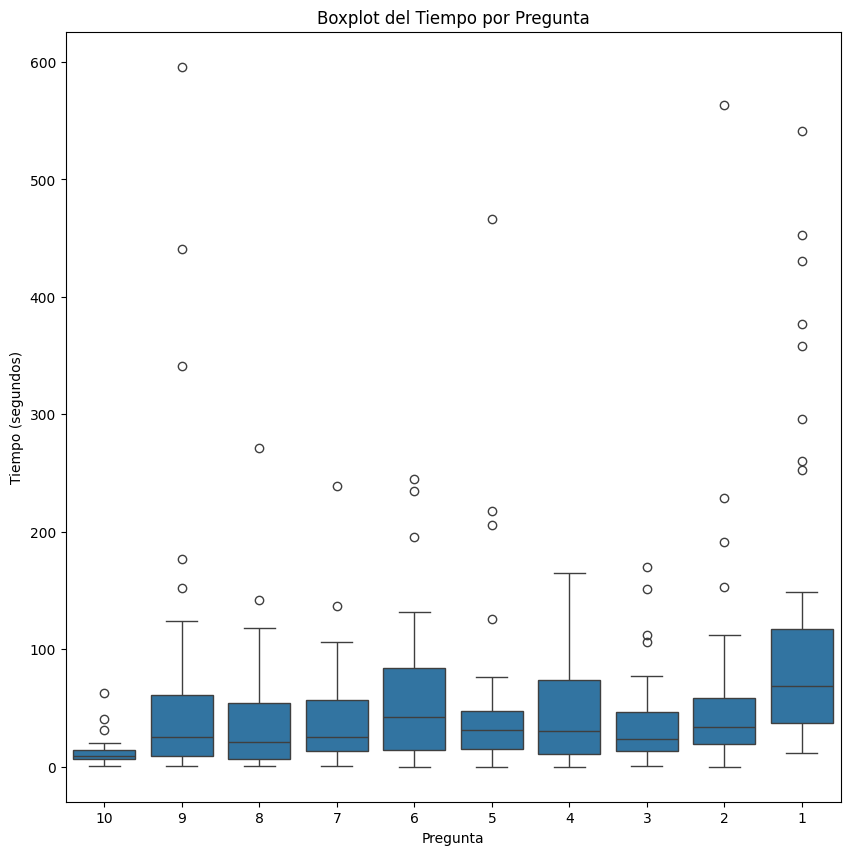

In [40]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="Pregunta", y="Tiempo", data=df)
plt.title("Boxplot del Tiempo por Pregunta")
plt.xlabel("Pregunta")
plt.ylabel("Tiempo (segundos)")
plt.show()

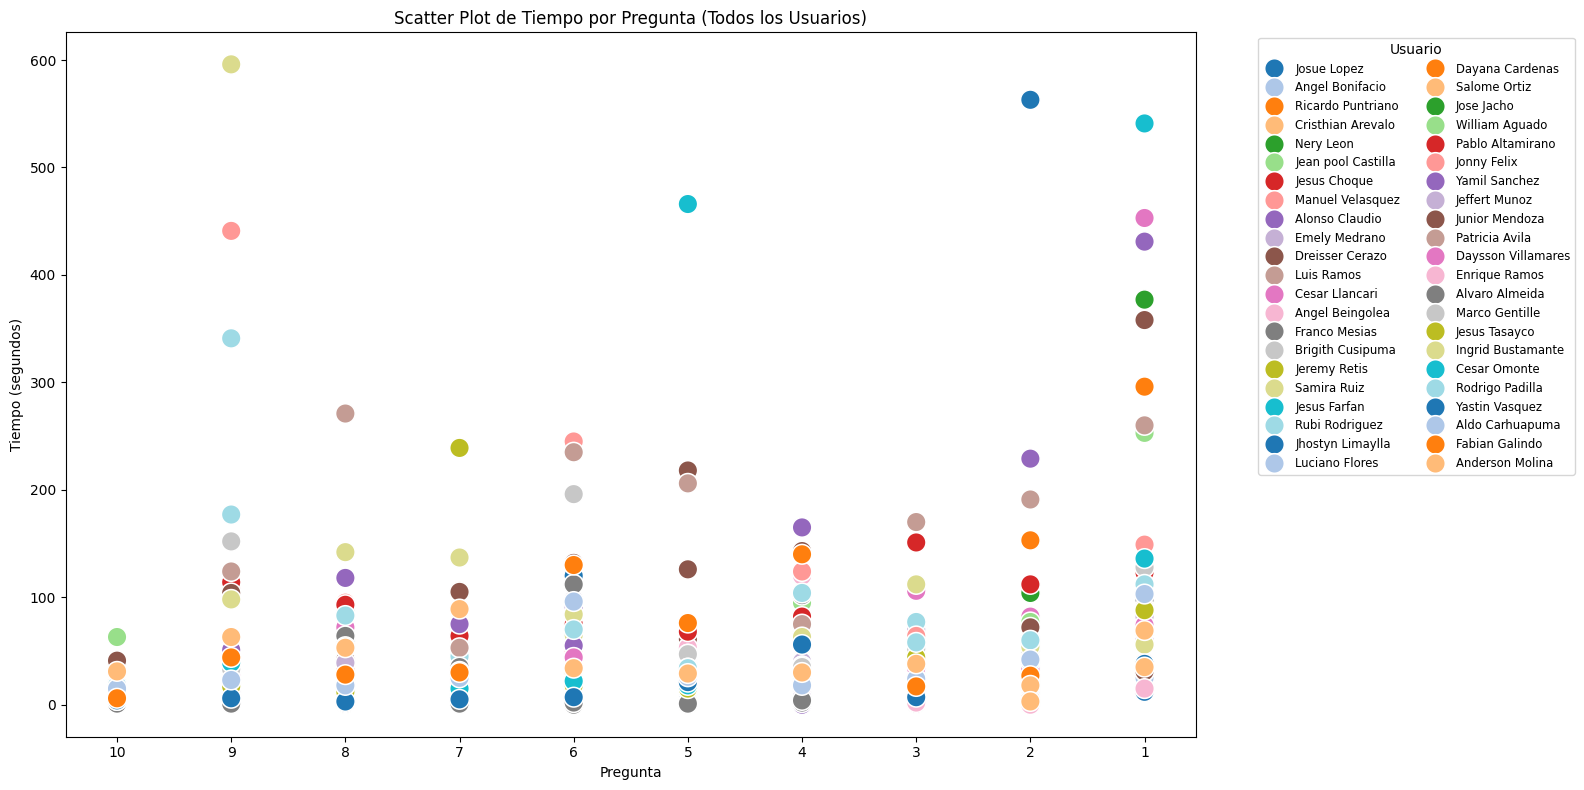

In [41]:
# Ajustaremos el tamaño del gráfico y el tamaño de los puntos para incluir a todos los usuarios de forma legible.
# También organizaremos la leyenda de manera que sea más fácil de leer.

plt.figure(figsize=(16, 8))  # Aumentar el tamaño de la figura
sns.scatterplot(x="Pregunta", y="Tiempo", hue="Usuario", data=df, s=200, palette="tab20")  # Reducir aún más el tamaño de los puntos
plt.title("Scatter Plot de Tiempo por Pregunta (Todos los Usuarios)")
plt.xlabel("Pregunta")
plt.ylabel("Tiempo (segundos)")
plt.legend(title="Usuario", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2, fontsize="small")  # Colocar la leyenda a un lado en dos columnas
plt.tight_layout()
plt.show()

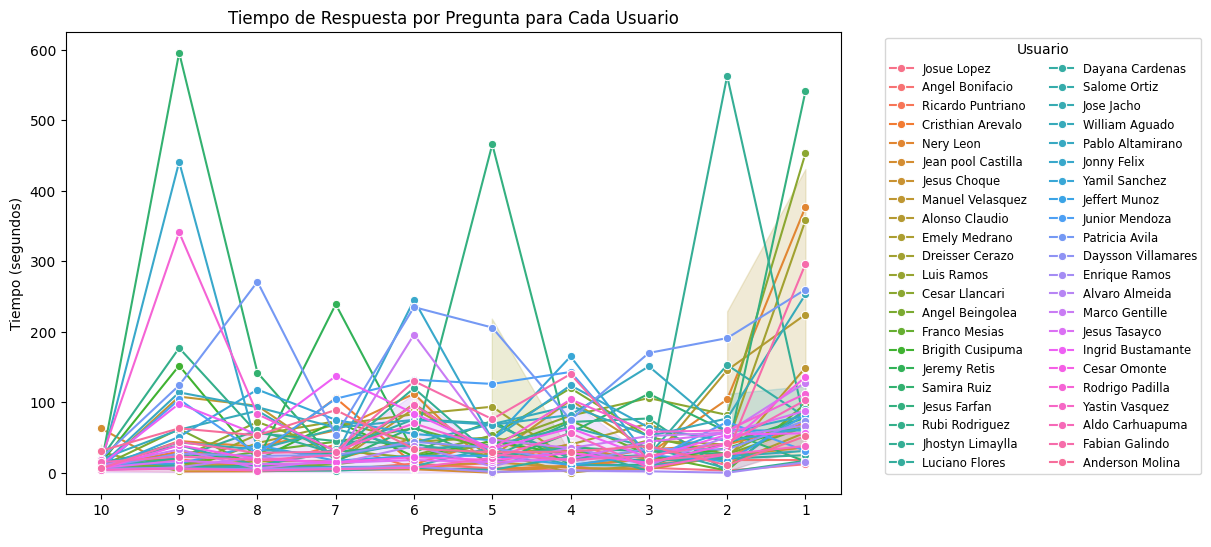

In [42]:
# 3. Gráfico de líneas para cada usuario
plt.figure(figsize=(10, 6))
sns.lineplot(x="Pregunta", y="Tiempo", hue="Usuario", marker="o", data=df)
plt.title("Tiempo de Respuesta por Pregunta para Cada Usuario")
plt.xlabel("Pregunta")
plt.ylabel("Tiempo (segundos)")
plt.legend(title="Usuario", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2, fontsize="small")  # Colocar la leyenda a un lado en dos columnas

plt.show()

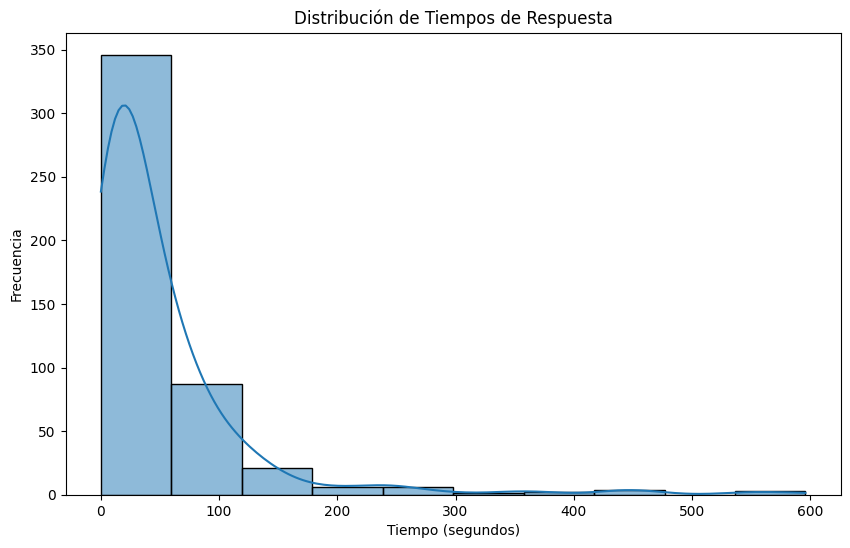

In [43]:
# 4. Histograma de tiempo de respuesta
plt.figure(figsize=(10, 6))
sns.histplot(df["Tiempo"], bins=10, kde=True)
plt.title("Distribución de Tiempos de Respuesta")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Frecuencia")
plt.show()

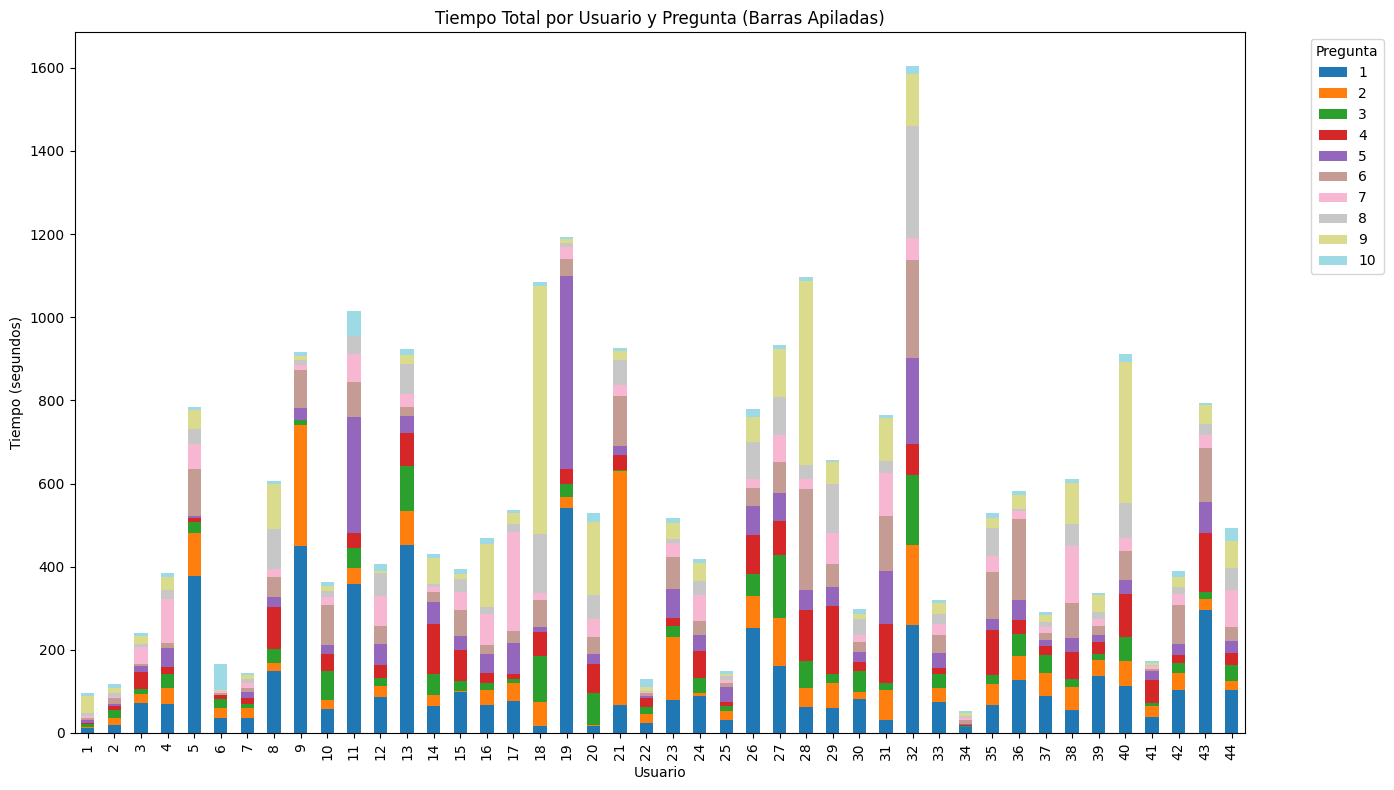

In [ ]:
df['Pregunta'] = pd.to_numeric(df['Pregunta'], errors='coerce')

pivot_table_sum = df.pivot_table(values="Tiempo", index="Id", columns="Pregunta", aggfunc="sum")

pivot_table_sum = pivot_table_sum[sorted(pivot_table_sum.columns)]

pivot_table_sum.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20")
plt.title("Tiempo Total por Usuario y Pregunta (Barras Apiladas)")
plt.xlabel("Usuario")
plt.ylabel("Tiempo (segundos)")
plt.legend(title="Pregunta", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

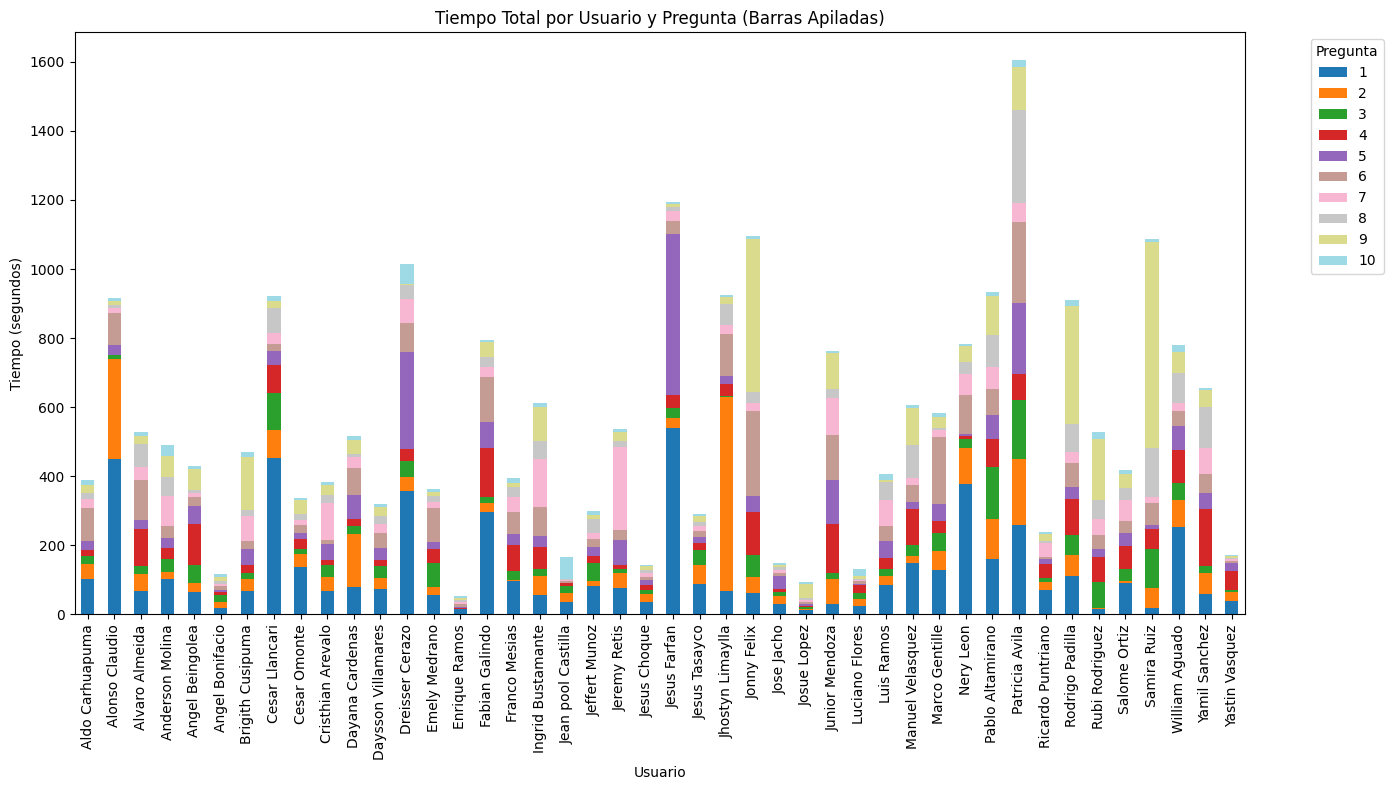

In [4]:
df['Pregunta'] = pd.to_numeric(df['Pregunta'], errors='coerce')

pivot_table_sum = df.pivot_table(values="Tiempo", index="Usuario", columns="Pregunta", aggfunc="sum")

pivot_table_sum = pivot_table_sum[sorted(pivot_table_sum.columns)]

pivot_table_sum.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20")
plt.title("Tiempo Total por Usuario y Pregunta (Barras Apiladas)")
plt.xlabel("Usuario")
plt.ylabel("Tiempo (segundos)")
plt.legend(title="Pregunta", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



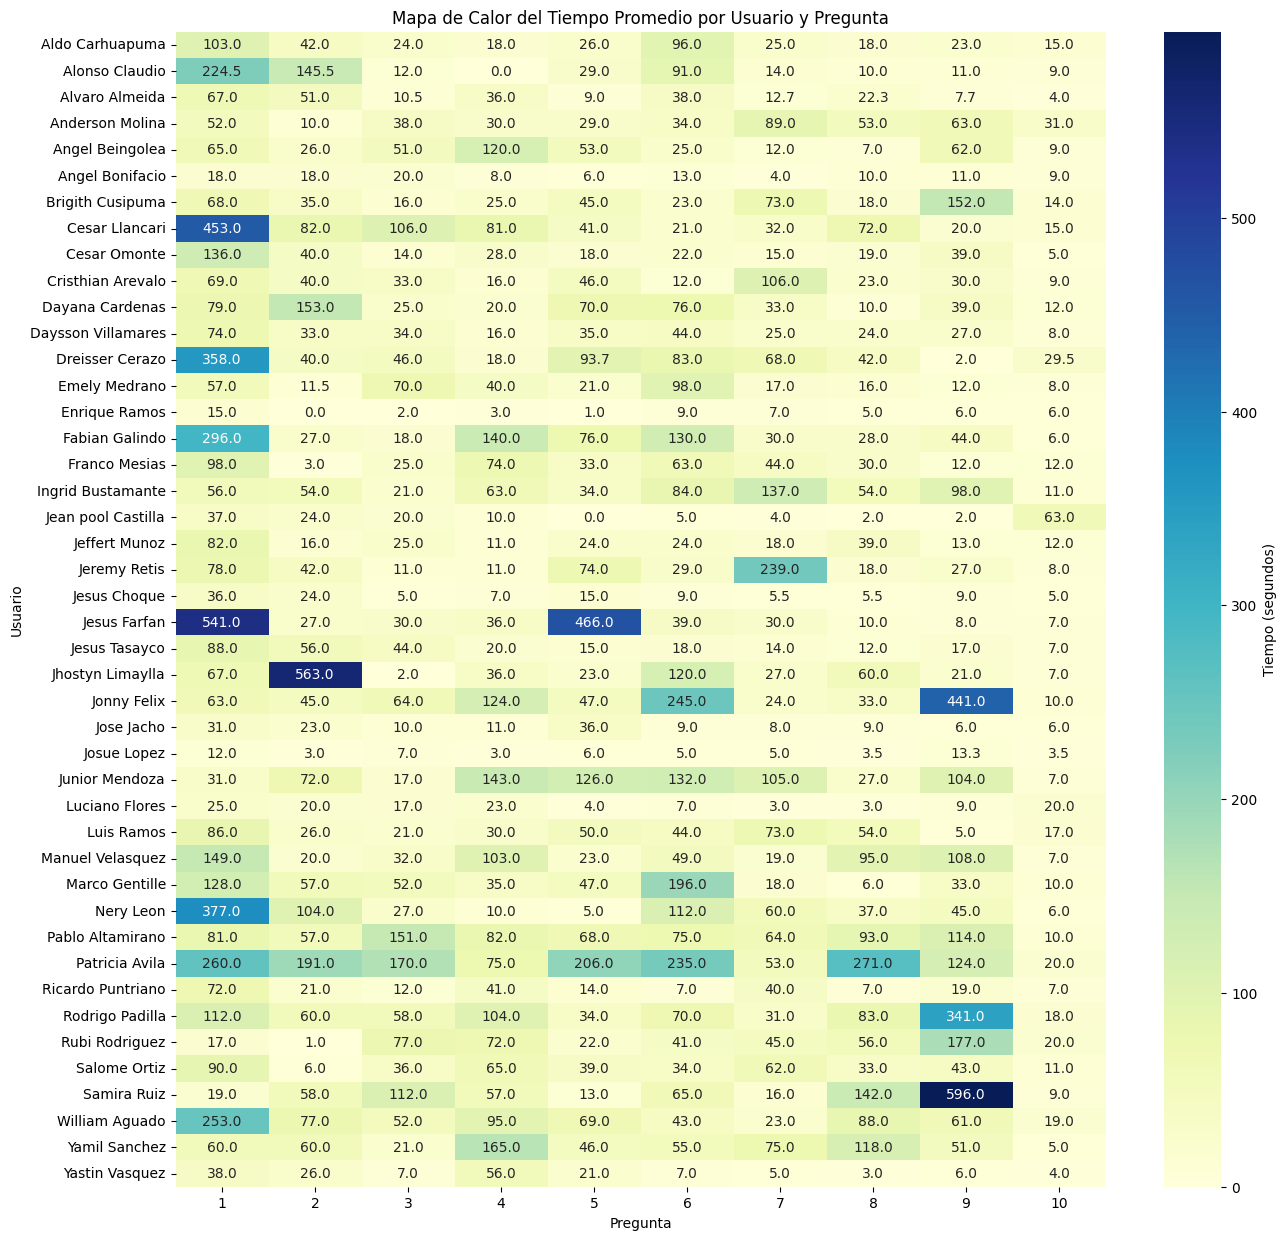

In [5]:

pivot_table = df.pivot_table(values="Tiempo", index="Usuario", columns="Pregunta", aggfunc="mean")

plt.figure(figsize=(15, 15))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Tiempo (segundos)'})
plt.title("Mapa de Calor del Tiempo Promedio por Usuario y Pregunta")
plt.xlabel("Pregunta")
plt.ylabel("Usuario")
plt.show()


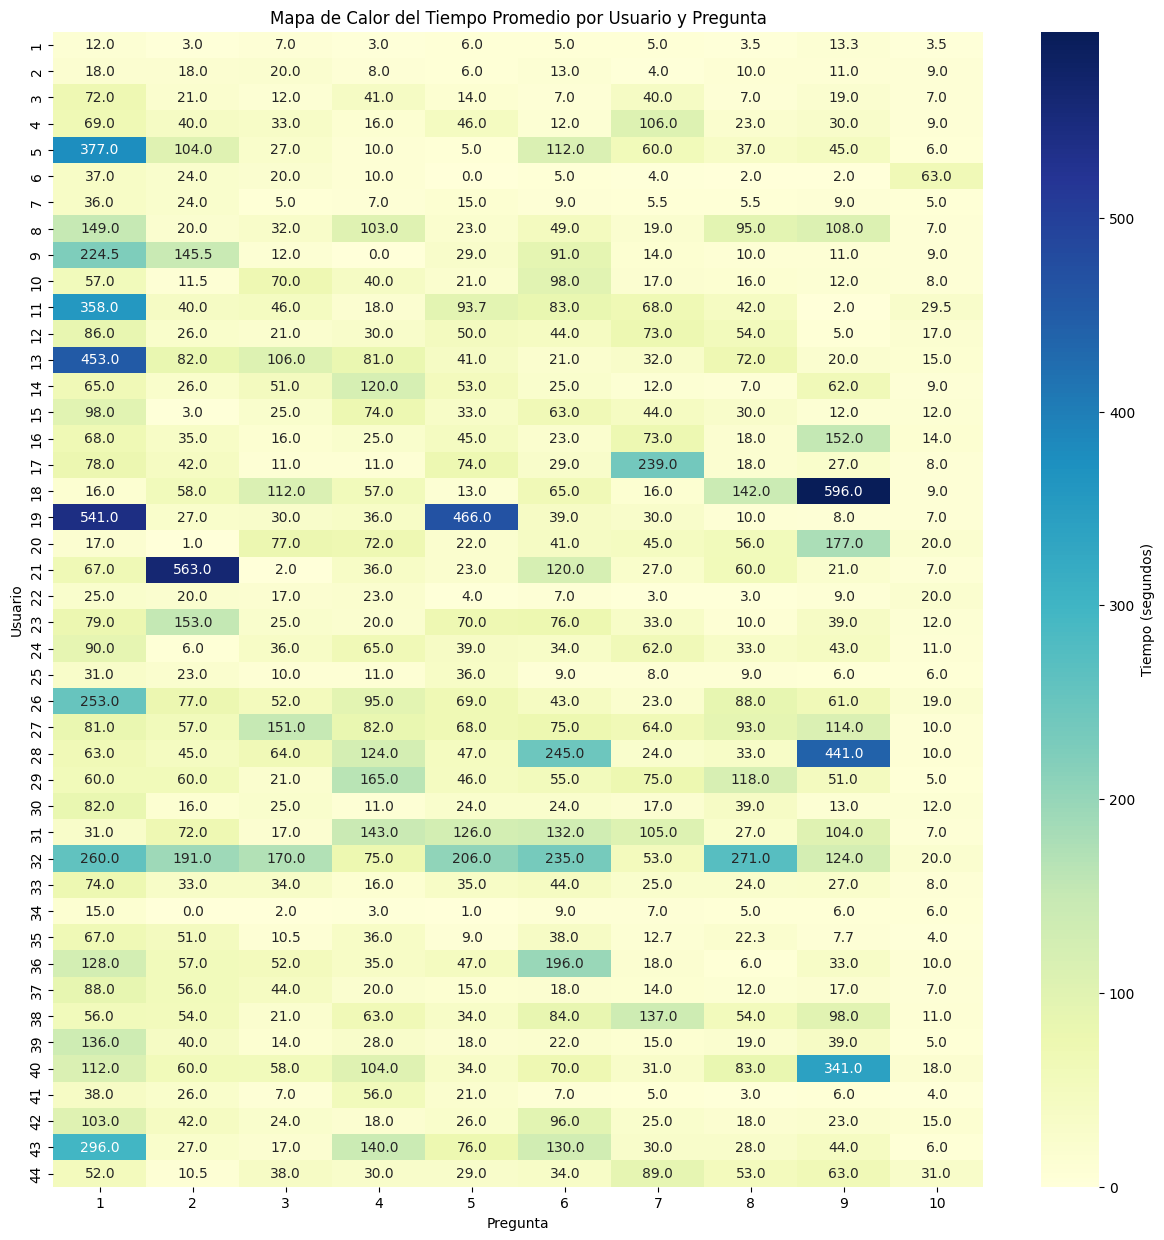

In [45]:

pivot_table = df.pivot_table(values="Tiempo", index="Id", columns="Pregunta", aggfunc="mean")

plt.figure(figsize=(15, 15))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Tiempo (segundos)'})
plt.title("Mapa de Calor del Tiempo Promedio por Usuario y Pregunta")
plt.xlabel("Pregunta")
plt.ylabel("Usuario")
plt.show()


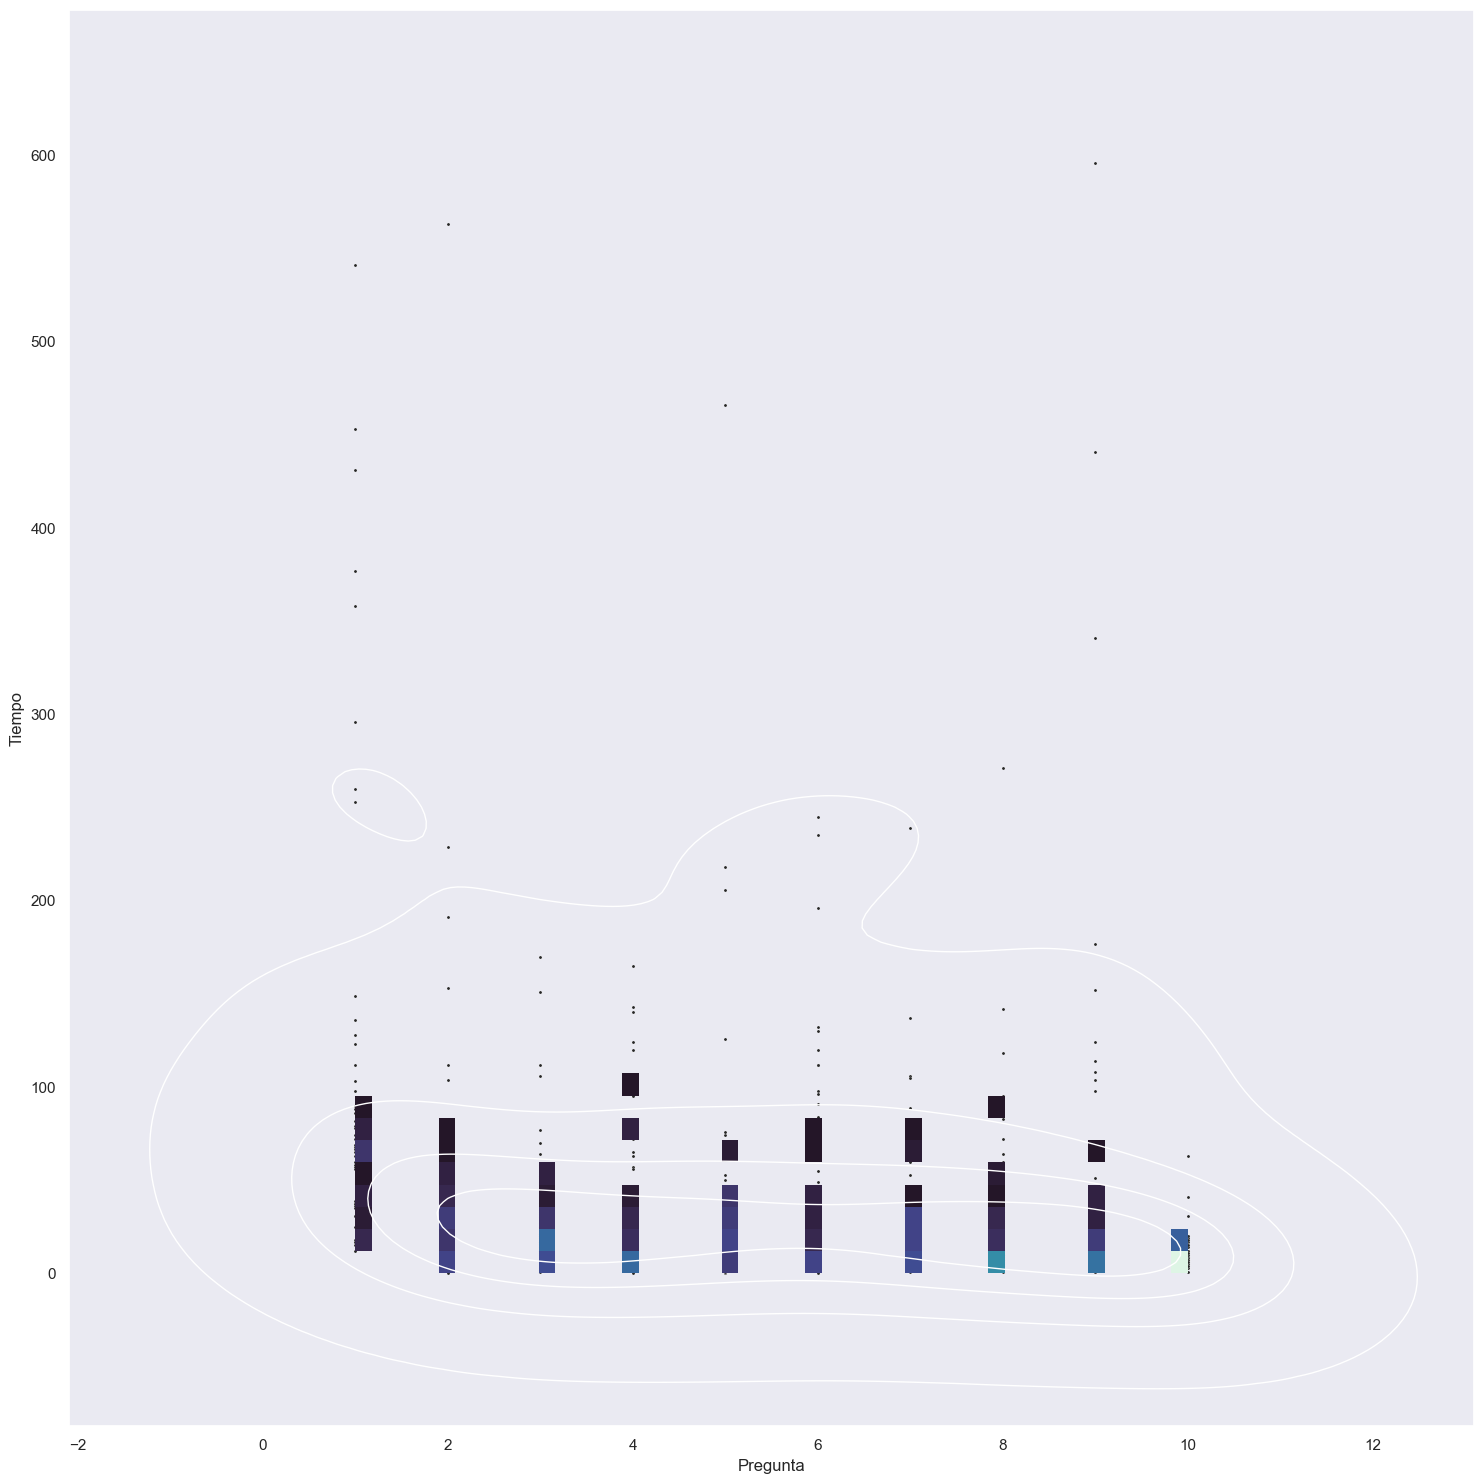

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu dataframe es df y tiene las columnas "Tiempo" y "Pregunta"
# Asegúrate de que tus datos estén en formato adecuado para realizar la gráfica
sns.set_theme(style="dark")

# Convertir "Pregunta" a un tipo numérico si es necesario (en caso de ser texto o categorías)
df['Pregunta'] = pd.to_numeric(df['Pregunta'], errors='coerce')

# Extraer las columnas "Tiempo" y "Pregunta"
x = df['Pregunta']
y = df['Tiempo']

# Crear una figura y un eje
f, ax = plt.subplots(figsize=(15, 15))

# Graficar el scatterplot con puntos
sns.scatterplot(x=x, y=y, s=5, color=".15")

# Graficar el histograma bidimensional
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")

# Agregar contornos de densidad
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

# Títulos y etiquetas
plt.xlabel("Pregunta")
plt.ylabel("Tiempo")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

